# Predicting Newsletter Subscription Among Minecraft Server Players
### DSCI 100 Group Project (Group 25)
Authors: Laian Saleh Nour (86794831), Qianrui Li (81348781), Nicky Taba (12738860), Keerith Phachu ()

In [54]:
### All necessary libraries should be run before continuing: 
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(dplyr)
library(readr)
library(ggplot2)
options(repr.matrix.max.rows = 6)

### (1) Introduction

Understanding the users behaviors is important to the game companies that want to improve their engagement and design more effective communication ways. Factors such as age and play habits can influence a player’s level of interest and willingness to stay connected through things like newsletters. By exploring these patterns, it will help us to reveal how different types of players interact with gaming communities and how these characteristics can be used to target more players.

**General question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:** Can age and the average number of hours played predict a player's subscribed status in the players dataset?

The data set that is going to be used is the “players.csv” data set in order to investigate the relationship between subscription status and different player characteristics. 

**Table 1: Variables in the players dataset**
| Variable | Type | Description |
|----------|------|-------------|
| hashedEmail | character | Unique player identifier (hashed for privacy) |
| Age | numeric | Player's age in years |
| experience | character | Self-reported gaming experience level |
| subscribe | logical | Whether player subscribed to newsletter (TRUE/FALSE) |
| gender | character | Player's reported gender |
| played_hours | numeric | Total hours played on the server |
| name | character | Includes the player’s name |

### (2) Methods & Results

First the data is read into the notebook:

In [55]:
player_data <- read_csv("https://raw.githubusercontent.com/Laiann/25_Final_Group_Project_Section_003/refs/heads/main/players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


The data is now wrangled to include only necessary variables for our classification model (which are age, hours played, and subscription):

In [56]:
clean_player_data <- player_data |> #This opens up the player data set and is assigned to clean_player_data
select(played_hours, Age, subscribe) |> #This line of code selects the columns that we are going to use in our model 
mutate(subscribe = as_factor(subscribe))
clean_player_data

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
⋮,⋮,⋮
0.0,57,FALSE
2.3,17,FALSE
0.2,NA,TRUE


The table above shows summary statistics for our predictor variables (age and played_hours):

In [57]:
#Summary statistics
players_mean <- clean_player_data |> #This code line selects the clean_player_data we formed above 
    summarize(
        mean_age = round(mean(Age,na.rm=TRUE),2),
        mean_played_hours =round(mean(played_hours,na.rm=TRUE),2)) 
#The summarize function is collecting the mean for the variables, na.rm=TRUE removes any observations that don't have any data 

players_mean


mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


Data is now split into training and testing datasets in order to use training for the model/visualizations:

In [58]:
#Initial split will divide the data into training and testing sets; the model will be trained on the training data.
#The prop function allows us to set the proportion of the training data (75%), and strata is used to ensure that the 
#positive classification is maintained—making sure the training and testing sets have roughly the same proportion of each 
#class (TRUE/FALSE).
#The training() function creates the training dataset.
#The testing() function creates the testing dataset.
#Seed is set in order to ensure reproducibility when working with functions that involve randomness
set.seed(1234)

players_split <- initial_split(clean_player_data, prop = 0.75, strata = subscribe)
players_train <- training(players_split) 
players_test <- testing(players_split)

For Figure 1 a scatter plot was chosen in order to see the relationship between the two quantitative variables (age and hours played) and how these variables impact the subscription status. Additionally this visualisation was also used to see if there are any patterns or correlation between the variables and their effect on subscription status.

The incorporation of  alpha = 0.7 for transparency is a design choice that addresses overplotting when taking into account two different variables being plotted against each other.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


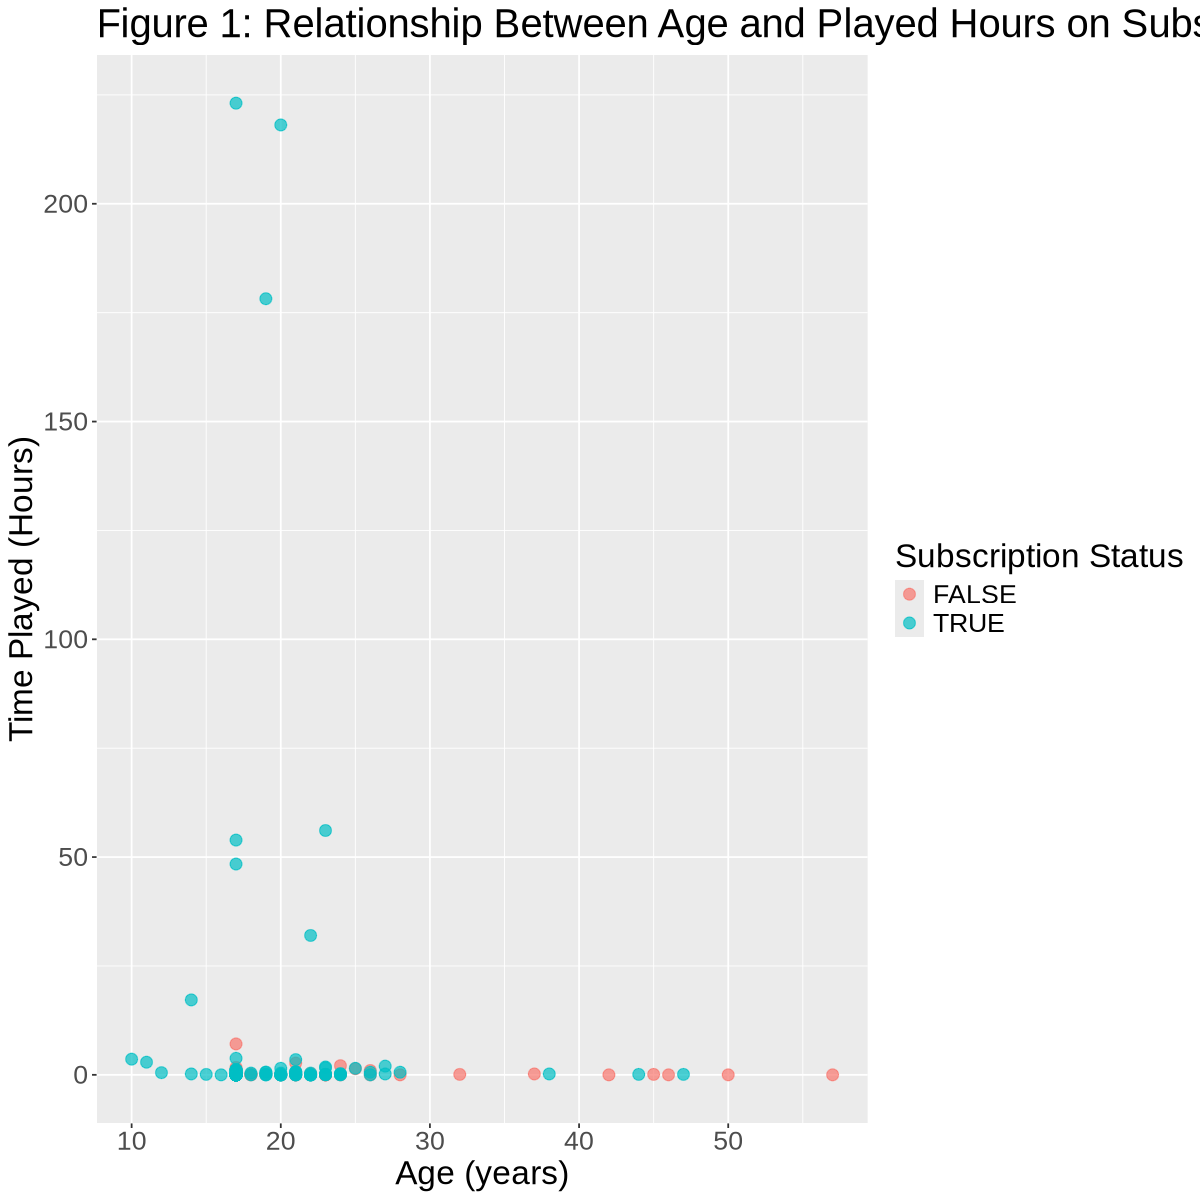

In [59]:
set.seed(1234)

#Figure 1
options(repr.plot.width = 10, repr.plot.height = 10) #This sets the plot width and height 
#The ggplot function allows us to plot the data with specific varaibles selected (Age and played hours)
#We are plotting the data on a scatterplot so we use the geom_point function
#Labs allows us to specifiy any axis labels or titles that we are going to use to ensure proper visualization techniques
players_figure_1 <- ggplot(players_train, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(
    title = "Figure 1: Relationship Between Age and Played Hours on Subscription Status",
    x = "Age (years)",
    y = "Time Played (Hours)",
    color = "Subscription Status")+
theme(text = element_text(size = 20))  
players_figure_1

For Figure 2 a scatter bar plot was chosen to see the relationship between the Age and whether the person will subscribe to the news. Because the age is a discrete variable, bar graph is the most appropriate visualization way to express the proportion data.

The incorporation of position = 'fill' directly compares the proportion of subscribers versus non-subscribers at each age regardless of how many players exist in that age category.


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


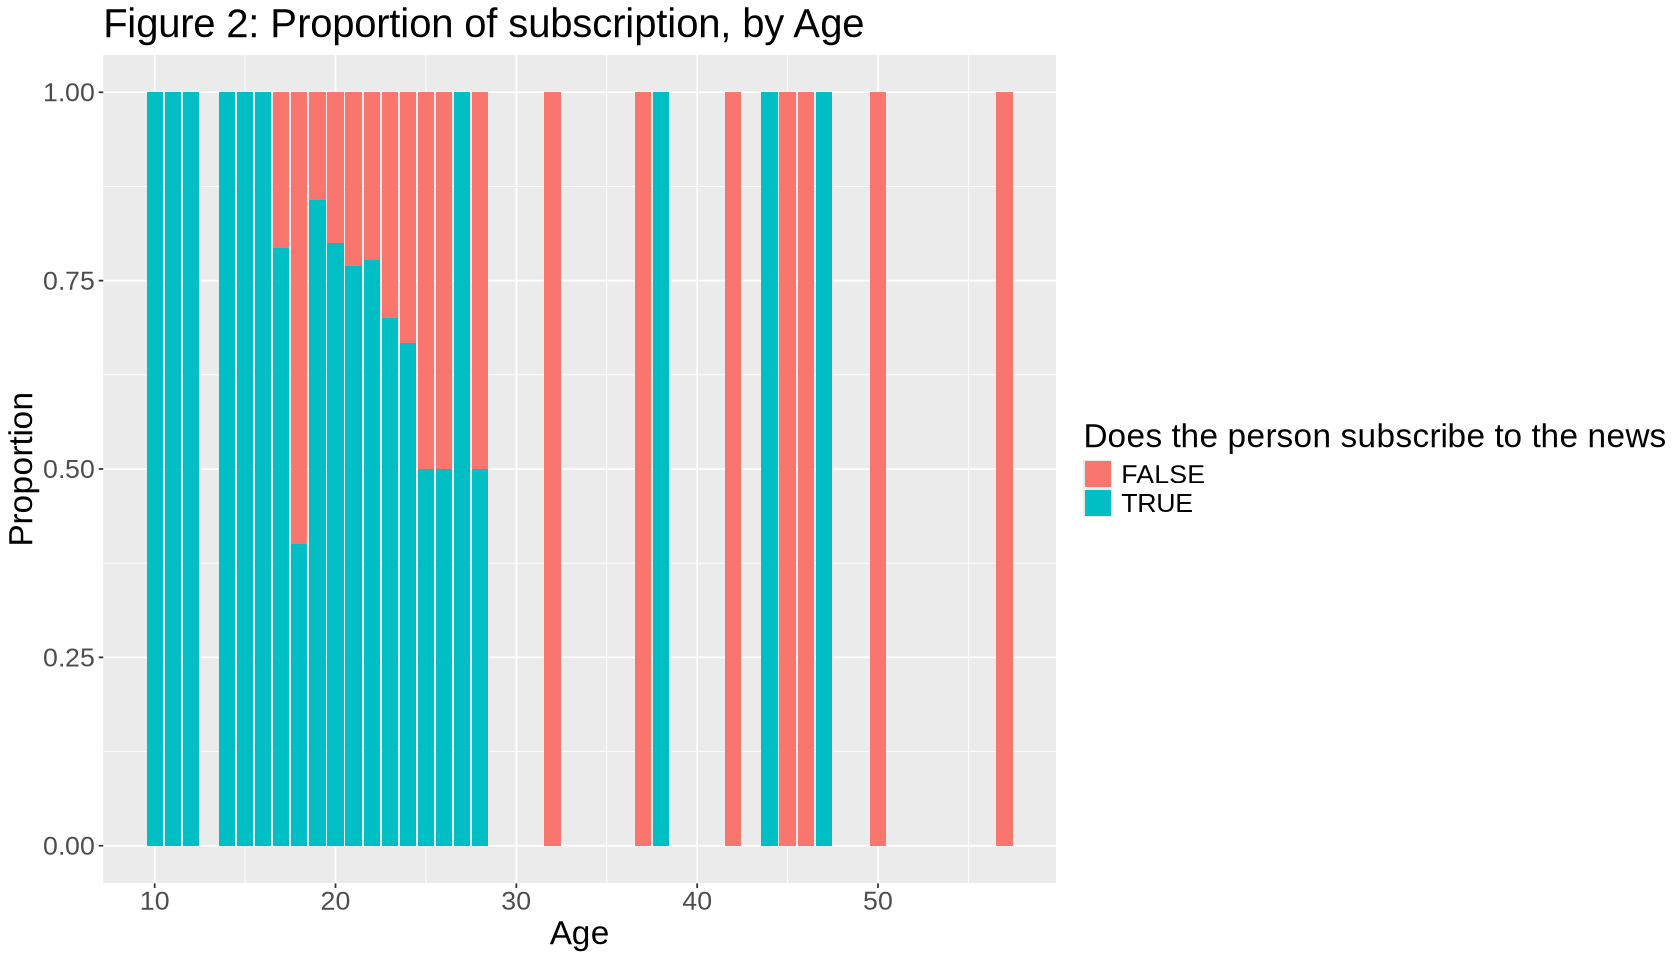

In [60]:
set.seed(1234)

#Figure 2
options(repr.plot.width = 14, repr.plot.height = 8) #This sets the plot width and height 
#The ggplot function allows us to plot the data with specific varaibles selected (Age and played hours)
#We are plotting the data on a bar plot so we use the geom_bar function
#Labs allows us to specifiy any axis labels or titles that we are going to use to ensure proper visualization techniques
players_figure_2 <- players_train|>
  ggplot(aes(x = Age, fill = factor(subscribe))) + 
  geom_bar(position = 'fill') +
  labs(x = 'Age', y ='Proportion', fill = "Does the person subscribe to the news", 
       title ='Figure 2: Proportion of subscription, by Age') +
  theme(text = element_text(size = 20))  
players_figure_2 

The KNN-classification model is created in order to see the best neighbour to use for the final classification:

In [61]:
#Setting the seed allows to code to be reproducible
set.seed(1234)

#The recipe function allows us to set the recipe for the data with the two predictors 
#Step scale and step center are used to ensure that the variables are on similar scale 
#so that the scale for Age or played_hours doesn't have more weight on the classifcation
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |> 
step_scale(all_predictors()) |>
step_center(all_predictors())

#Here we are applying the nearest_neighbor function to tune for the best K value to use
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

#Here we are assigning the recipe for the training data and the cross validation
players_recipe <- recipe(subscribe ~., data = players_train)
players_vfold <- vfold_cv(players_train, v = 5, strata =subscribe )

#This step creates a tibble listing the k-values (1–10) that will be tested during the tuning of the K-Nearest Neighbors model
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

#This code builds a workflow with the recipe and 
#KNN model, tunes the model across the specified k-values using cross-validation, and then collects the performance metrics
knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = players_vfold, grid = k_vals) |>
                 collect_metrics()
knn_results

#This code selects the K value that achieved the highest mean accuracy from all the tuning results
best_k <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1)

best_k

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4888889,3,0.06186405,Preprocessor1_Model01
1,roc_auc,binary,0.5056818,3,0.05576679,Preprocessor1_Model01
2,accuracy,binary,0.4888889,3,0.06186405,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.3996212,3,0.06986429,Preprocessor1_Model09
10,accuracy,binary,0.5666667,3,0.06666667,Preprocessor1_Model10
10,roc_auc,binary,0.4232955,3,0.02427274,Preprocessor1_Model10


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,accuracy,binary,0.6111111,3,0.04444444,Preprocessor1_Model08


There is a mismatch between the number of rows in the existing data and assigned data, however this does not impact the model or the best k, therefore will not impact the results so will be dismissed. 

Figure 3 is created in order to visualize the best k value based on the workflow:

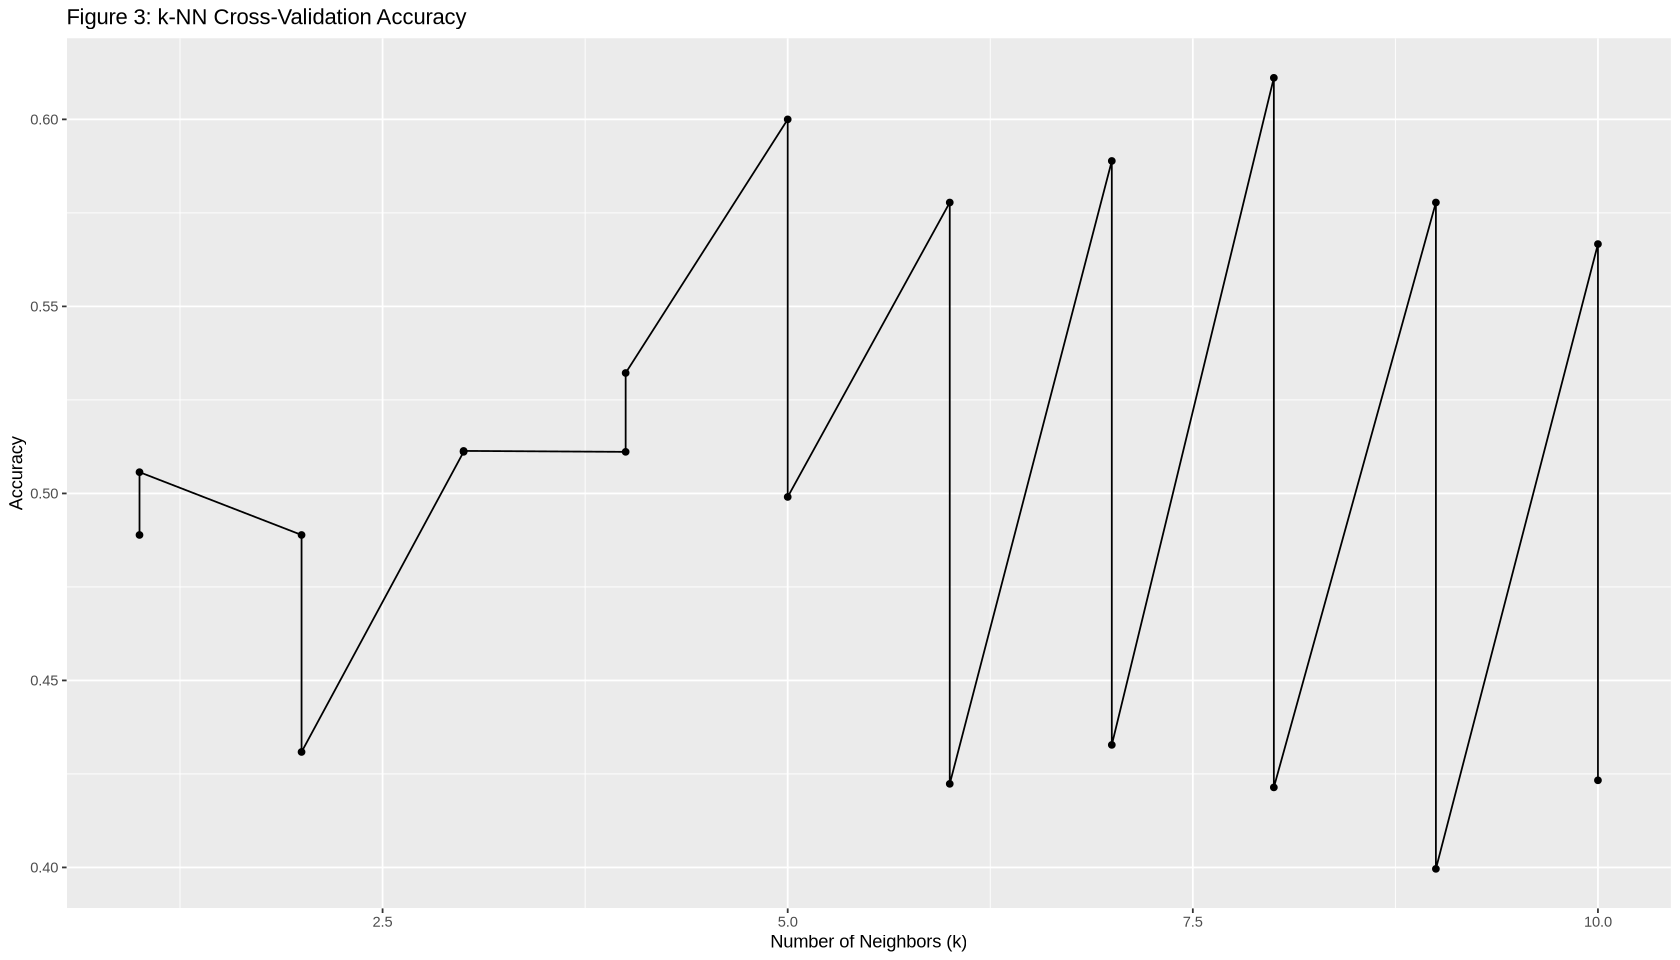

In [62]:
set.seed(1234)

# Figure 3
cross_val_plot <- knn_results |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point()+
  geom_line() +
  labs(
    title = "Figure 3: k-NN Cross-Validation Accuracy",
    x = "Number of Neighbors (k)",
    y = "Accuracy"
  ) 

cross_val_plot

The code for the best k matches with the Figure 3 therefore proving the best neighbour is 8. 

The new model is created with the best neighbor and test dataset to utilize for future classification/predictions:

In [63]:
set.seed(1234)

# This code defines and fits the KNN classification model with 8 neighbors, then 
#uses it to generate predictions on the test dataset. 
#It then evaluates the model by calculating accuracy metrics 
#and creating a confusion matrix based on the predicted and actual subscription status.

player_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = 8
) |>
  set_engine("kknn") |>
  set_mode("classification")

player_fit <- player_spec |>
  fit(subscribe ~ ., data = players_test)

player_predictions<-predict(player_fit, new_data=players_test)|>
    bind_cols(players_test)

player_metrics<-player_predictions|>
    metrics(truth=subscribe, estimate=.pred_class)

player_conf_mat<-player_predictions|>
    conf_mat(truth=subscribe, estimate=.pred_class)

A new observation for a player with age 25 and 55 hours played was then predicted for their subscription status:

In [64]:
set.seed(1234)

# Predicting new observation (Player age 25, hours played 55 hours)
new_player<-tibble(Age=25, played_hours=55)
player_predicted<-predict(player_fit,new_player)

player_predicted

.pred_class
<fct>
TRUE


The model predicted the status as true (subscribed), so now a visualisation was created in order to see if the prediction is true or not:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


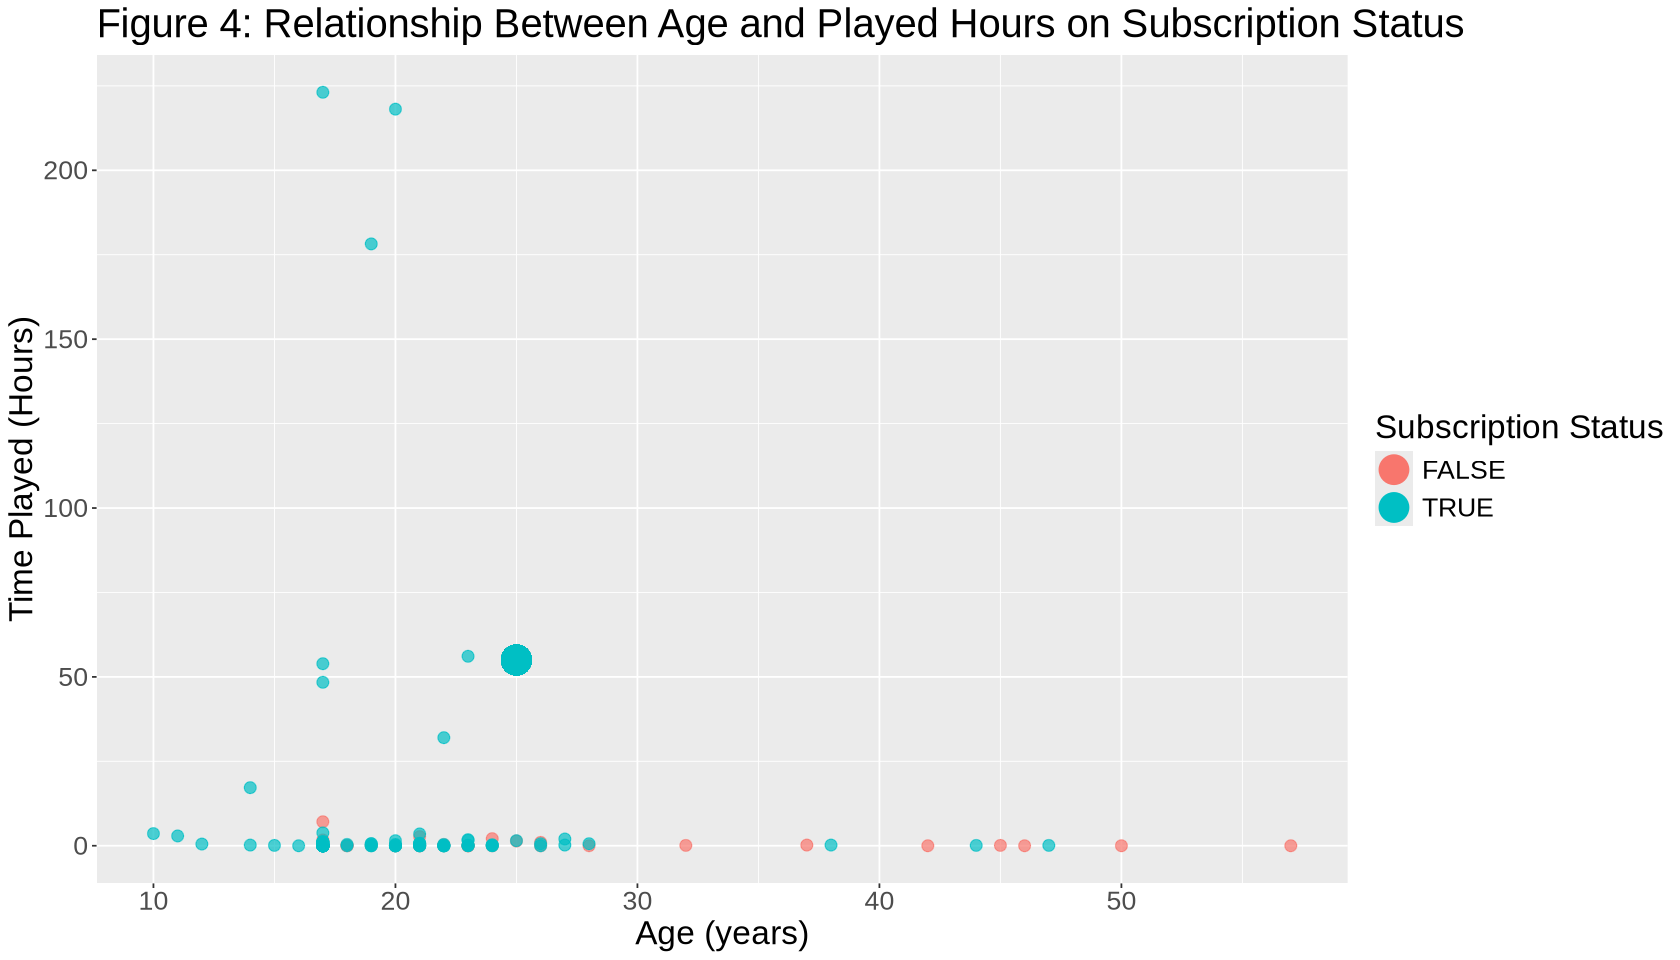

In [65]:
set.seed(1234)

# Seeing if prediction is correct
players_figure_4 <- ggplot(players_train, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(
    title = "Figure 4: Relationship Between Age and Played Hours on Subscription Status",
    x = "Age (years)",
    y = "Time Played (Hours)",
    color = "Subscription Status")+
theme(text = element_text(size = 20)
     )  

# Predicted point is in a larger size in order for easier visualization  
players_figure_4 +
        geom_point(aes(x=25,y=55, color=subscribe),size=8)

### ***(3) Discussion:***

**Summary of findings:** 

After wrangling and visualising the data given by player.csv, we were able to investigate whether players’ age and hours played could predict newsletter subscription status among players on a UBC Minecraft research server. Ultimately, we came to the conclusion that using K-nearest neighbors classification was the most efficient way of having a predictive model while evaluating its performance through cross-validation and test set evaluation. 

The exploratory data analysis demonstrated important patterns in the dataset of 196 players. Figure 1 displays the relationship between age and hours played, coloured by subscription status. As evident, there is substantial overlap between the two groups, subscribers and non-subscribers, with most players clustered at the lower hours played (under 50 hours). There are also a few outliers who have contributed a remarkable amount, exceeding 200 hours. As for the age variable, it is primarily distributed from teenagers to adults in their 50s, with the majority falling between 15 to 35 years old. 

Figure 2 consisting of the proportional bar chart, examines subscription rates across different ages. With this graph we were able to observe a subtle difference in patterns. Players in their late teens to early twenties are of a higher frequency in terms of subscribers, shown in teal, and the older age groups are more prominently shown in red, indicating that they are non-subscribers. This visualisation suggests younger players may be more inclined to subscribe to gaming newsletters. Furthermore, we were able to distinguish how some of the older age groups contained very few observations, making the proportions less statistically reliable. Nonetheless, with the widespread presence the teal colour shows in the left side of the graph, we can conclude that younger players are considerably more likely to subscribe to gaming newsletters than their older counterparts. 

Our K-NN model, which has been tuned to the K values 1 to 10, identifies that K = 8 as optimal, achieving approximately 61% accuracy based on the cross-validation results we received. This can be indicative of some room for improvement, even though it is higher than 50% which is considered random guessing. The cross-validation plot showed accuracy fluctuating between roughly 49% and 61% across different K values. The new observation right after tests a 25 year old player with 55 hours played. This model predicts that they would be subscribed, indicated by TRUE, which corresponds with the pattern we discover within the younger players tending to subscribe more frequently. 

Our data and the analysis we were able to produce appears to be a meaningful predictor of newsletter subscription, with younger players subscribing at notably higher rates. Hours played reveals that highly engaged players with substantial playtime are more likely to subscribe, though this pattern is most visible among outliers rather than the majority of players. This information is backed up by our percentage of accuracy, scoring a 61%, which brings certainty to our results, however, it is further conclusive of how subscription decisions involve additional unmeasured factors such as gaming preferences or prior newsletter experiences. By identifying age and playtime as contributing factors, this analysis offers us with a clear answer to the purpose of this research.

**Comparison to Expectations:**

Before beginning to build our analysis model, we expected that age and played hour would serve a relatively strong and reliable predictor of newsletter subscription status. By intuition, we tend to assume the players who spend more time playing the game are more willing to subscribe to the newsletter. Moreover, we anticipated that age will also reflect their communication preference or the level of interest in receiving the update. We suppose the older players are more inclined to follow the community news and the younger players potentially be less consistent in doing so.

After visualizing and modeling the data, some results aligned with expectations while others were surprising. The scatter plot (Figure 1) showed a general tendency for higher playtime to correlate with subscription, but also substantial overlap between groups. Many low-hour players had subscribed, contradicting the clear upward trend we anticipated. The heavy clustering below 50 hours made the two classes difficult to separate.For the age, a similar pattern emerged. We observed higher subscriptions among players in the late teenage to young adult range(16-26). By observing the figure1 and figure2, the results revealed a relation that was noticeably stronger than the one observed for played hours, and slightly different from what we initially anticipated. Which is to assume more older players are more willing to subcribe.

Overall, the results confirmed our general expectation that age and playtime would matter, but they also showed that these two variables alone are not strong enough to make highly accurate predictions. This is supported by the performance of our k-NN model: the best-performing value of k=8 achieved a cross-validation accuracy of 0.611. These results suggest that although the age and played- hours contribute to the predictive signal, the signal is not relatively strong or distinct enough to clearly separate subscribers from non-subscribers. Therefore, subscription behaviour is likely influenced by additional factors not included in the dataset, such as player motivation, social networks on the server, or exposure to prior announcements. This means that although our initial assumptions were directionally correct, the actual relationships were weaker, more complex, and less predictable than we anticipated.

**Impacts of Findings:**

The findings from this project have many potential impacts on how game companies understand and interact with their players. By examining which player characteristics, specifically in our investigation age and average hours played, predict the likelihood of how subscribing to a game-related newsletter. Companies gain valuable insight into the behavioural patterns that shape community engagement. Newsletter subscription is not just a marketing variable, it is rather a measurable indicator of a player’s willingness to stay connected, informed, and invested in a game. Therefore, identifying the traits associated with higher subscription rates can help companies in designing more effective communication strategies and engagement tools to reach their target audience. 

Our analysis reveals that players with greater playtime and older teens to younger adults (16-26) are more inclined to subscribe, this information allows companies to refine their outreach efforts. For example, marketing teams could create content that resonates more with these “target audiences", such as updates about advanced game mechanics, exclusive events, social media targeting, or competitive features that appeal to long-term users. These players may also be more receptive to early-access announcements or community-building initiatives. On the other hand, much younger and much older players or those who spend fewer hours in the game might require different approaches to encourage them to actually subscribe to the newsletter. Companies could experiment with shorter, visually appealing emails, sign-up incentives, or interactive elements designed to grab the attention of players who do not engage as much or consistently. Beyond just communication, the results of our analysis can influence broader design and development decisions. 

Overall, insight from this analysis can improve the alignment between player needs and company strategies. By using this data-driven understanding of player characteristics, game companies can strengthen retention, increase player satisfaction and create a more inclusive gaming community. 

**Future Questions:**

In the future more predictor variables can be added to the players.csv data set; number of friends on server, the type of platform the individual is using and other games that the user plays. For example, the number of friends on the server could potentially increase the chance that the user is going to subscribe and if the individual has other games similar to minecraft that may also increase chances for subscription. 

Additionally, it might be useful to understand how long the individuals have been subscribed for. This can provide even more information about whether specific groups of individuals tend to stay subscribed longer, allowing the individuals running the server to gain insights into whether the server needs additional promotions to keep people subscribed. 

Expanding on the promotional aspect, another question that can be proposed is what is the turnover rate when marketing server promotions, with rewards and reminders. Do the individuals that receive these promotions actually subscribe? How frequent should these promotions be to maximize turn over rates? In general this data would provide a basis for whether marketing is an effective strategy to increase subscriber count. 


Another aspect of our analysis that can help answer future questions is how certain age groups can predict subscription status, which can then have the servers increase their capacity when this specific age group has holidays. For example, most of the individuals subscribing are within the 10-20 year old range, so knowing that would allow the servers to increase their capacity during summer/winter break so that there aren't any technical problems during high server capacity times. They can also implement more promos and rewards during these times to increase user satisfaction rates.


In conclusion, our project provides a basis for many different future questions/observations and we hope that it helps Frank Wood’s research team at UBC with their study. 